### Importin the Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

### importing the dataset(we are using cifar10 dataset)

In [44]:
from keras.datasets import cifar10
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

In [45]:
#we are gonna check the shape of the dataset

In [46]:
X_train.shape

(50000, 32, 32, 3)

In [47]:
X_test.shape

(10000, 32, 32, 3)

In [48]:
y_train.shape

(50000, 1)

In [49]:
y_test.shape

(10000, 1)

## Data Visualization

[9]


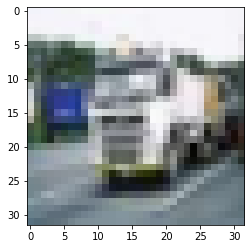

In [50]:
plt.imshow(X_train[1000]) 
print(y_train[1000])

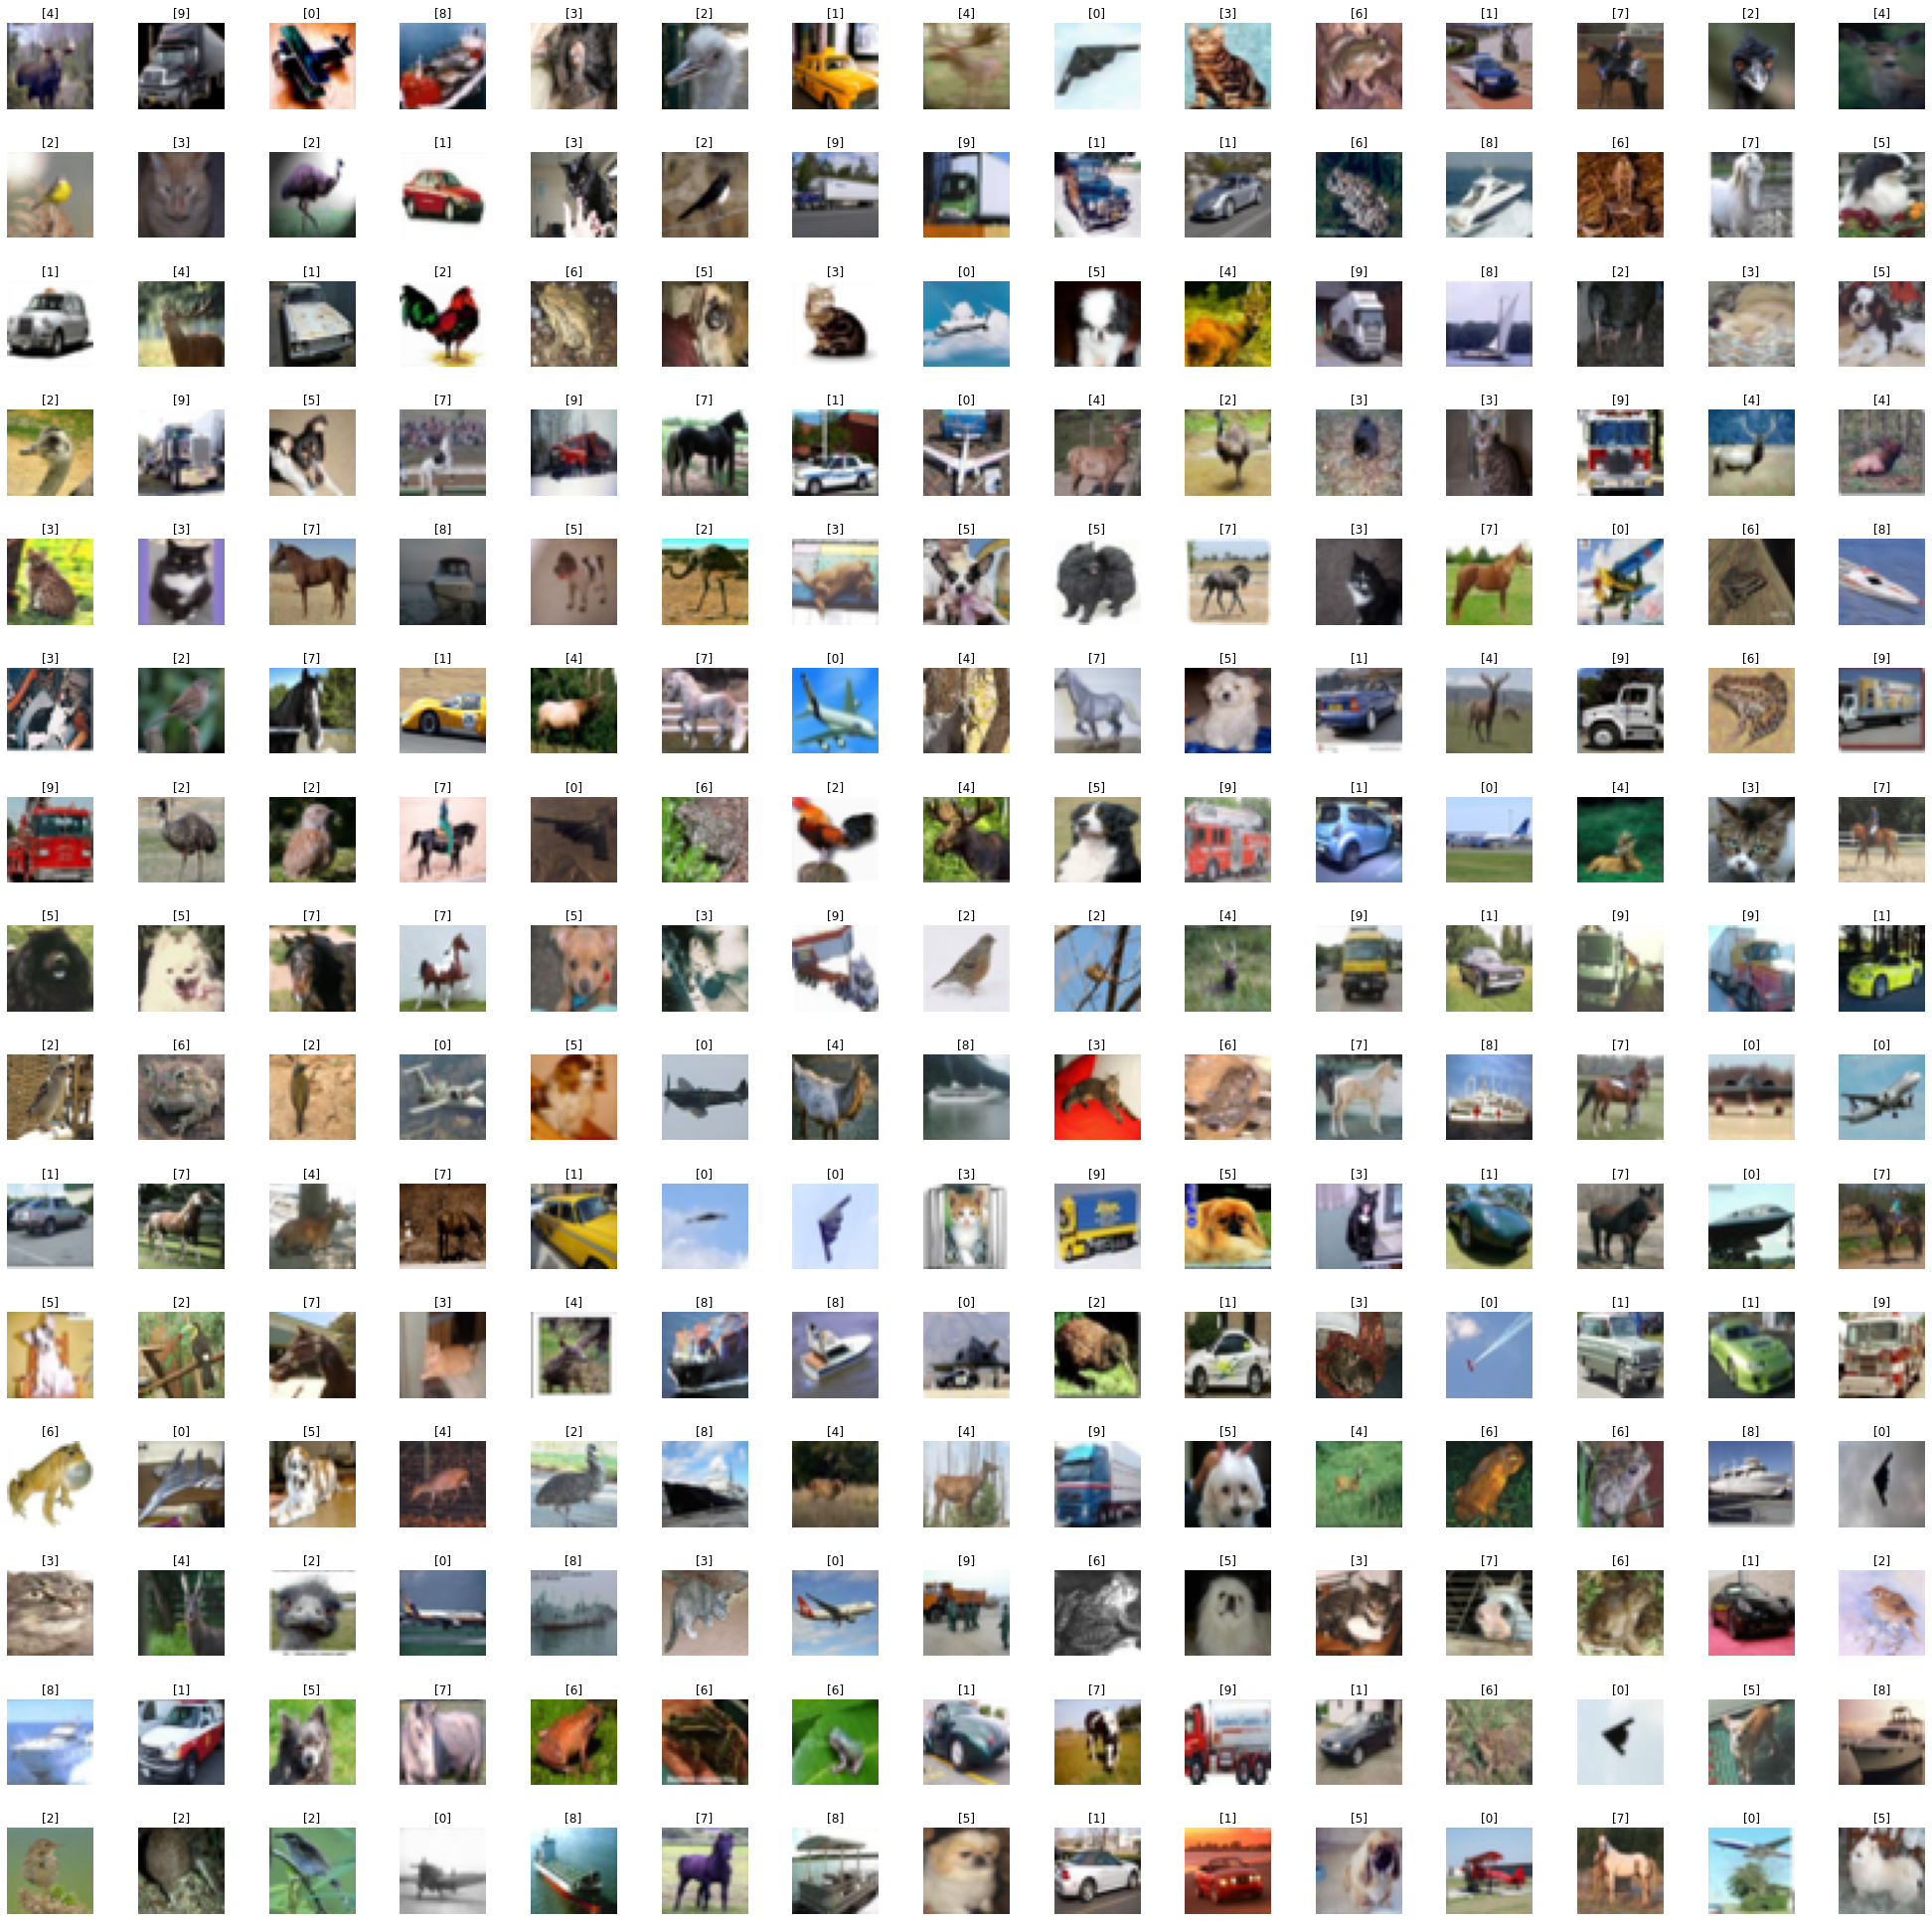

In [51]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(W_grid, L_grid, figsize = (35,35))
axes= axes.ravel()

n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0,n_training) #picking a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) #shows the target class
    axes[i].axis('off') #removes the axis(the digits shown in the images)
    
plt.subplots_adjust(hspace = 0.5) #hspace- space between the images

## Data Preperation

In [52]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [53]:
number_cat = 10

In [54]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [55]:
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [56]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [58]:
X_train = X_train/255
X_test = X_test/255

In [59]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [60]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [61]:
X_train.shape

(50000, 32, 32, 3)

In [62]:
Input_shape = X_train.shape[1:]      #to specify the input shape

In [63]:
Input_shape

(32, 32, 3)

## Model Training

In [77]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import adam
from keras.callbacks import TensorBoard

In [79]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))   #output layer

In [80]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [82]:
history = cnn_model.fit(X_train, y_train, batch_size = 128, epochs = 20, shuffle = True)

Epoch 1/20
391/391 [==============================] - 719s 2s/step - loss: 0.2280 - accuracy: 0.9255
Epoch 2/20
391/391 [==============================] - 697s 2s/step - loss: 0.1889 - accuracy: 0.9383
Epoch 3/20
391/391 [==============================] - 682s 2s/step - loss: 0.1826 - accuracy: 0.9438
Epoch 4/20
391/391 [==============================] - 687s 2s/step - loss: 0.1652 - accuracy: 0.9495
Epoch 5/20
391/391 [==============================] - 612s 2s/step - loss: 0.1596 - accuracy: 0.9521
Epoch 6/20
391/391 [==============================] - 417s 1s/step - loss: 0.1483 - accuracy: 0.9560
Epoch 7/20
391/391 [==============================] - 413s 1s/step - loss: 0.1493 - accuracy: 0.9570
Epoch 8/20
391/391 [==============================] - 411s 1s/step - loss: 0.1346 - accuracy: 0.9606
Epoch 9/20
391/391 [==============================] - 409s 1s/step - loss: 0.1323 - accuracy: 0.9614
Epoch 10/20
391/391 [==============================] - 409s 1s/step - loss: 0.1330 - accura

In [83]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Evaluation: {}'.format(evaluation[1]))

313/313 [==============================] - 14s 45ms/step - loss: 2.8108 - accuracy: 0.7202
Test Evaluation: 0.7202000021934509


In [84]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=-1)
predicted_classes

313/313 [==============================] - 15s 46ms/step


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [85]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

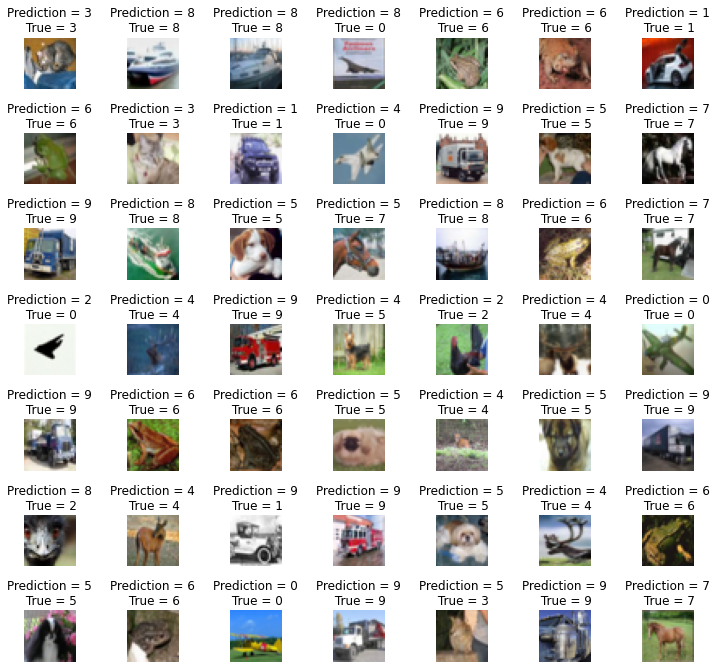

In [89]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)
    

## Confusion Matrix

<AxesSubplot:>

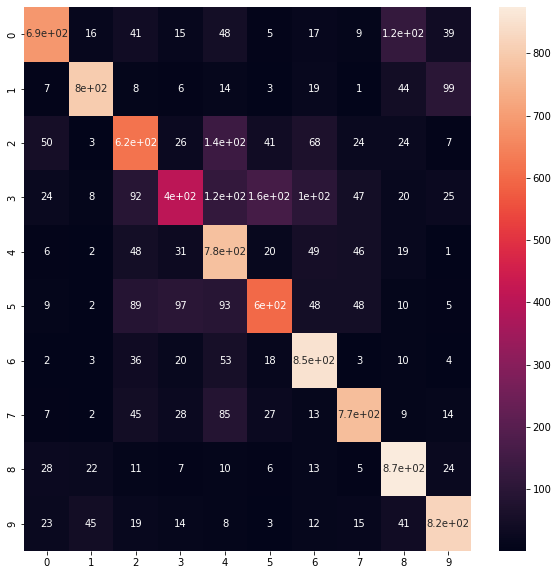

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

## Saving the model

In [94]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'CiFar10_cnn.h5')
cnn_model.save(model_path)